**Komentarz do wyników:**  
Bazując jedynie na zbiorze testowym, zwiększanie parametru m znacząco poprawia wyniki. Dla małych m otrzymana funkcja jedynie "uśrednia" prawdziwe oceny. Zwiększając m dostajemy wykres coraz bardziej zbliżony do oczekiwanego.  
Dodając zbiór walidacyjny widzimy, że przy tak małej ilości danych nie da się zrobić sensownej predykcji. Mimo, że zbiór testowy dopasowuje się prawie idealnie, tak próbując sprawdzić predykcje na nowych danych okazuje się, że są one dalekie od oczekiwań. Wynika to z faktu, metoda regresji liniowej nie jest dla postawionego problemu najlepszym rozwiązaniem. Ponadto zbiór użytkowników jest za mały.   
**Wnioski:**  
Minimalizując funkcję kosztu, program uczy się zbioru treningowego na pamięć, co nie przekłada się w większym stopniu na dobrą jakość predykcji. Powodem tego jest zapewne mała liczba użytkowników branych pod uwagę oraz mała liczba wystawionych ocen (czyli różnych od 0).

In [1]:
import matplotlib.pyplot as plt
import numpy as np 

**Parametry:**  
**m** - liczba ocen branych pod uwagę (w tym 0 dla braku danych), nie licząc oceny za "Toy Story"  
**n** - liczba osób, których oceny bierzemy pod uwagę (**max 215**)  
**trainsize** - wielkość zbioru treningowego, jeśli trainsize = n, to zbiór walidacyjny jest pusty (**max n**)

In [2]:
m = 10000
n = 215
trainsize = 200

Importowanie danych

In [3]:
with open('ml-latest-small/ratings.csv', 'r') as file:
     raw_data = file.read()

Konwerowanie danych

In [4]:
temp = raw_data.split('\n')
data = [row.split(',') for row in temp[1:-1]]
users = [x[0] for x in data if x[1] == '1']
users = users[:n]

In [5]:
X = [[0.0 for i in range(m)] for j in range(n)]
for row in X:
    row.append(1.0)
Y = [[0.0] for i in range(n)]

In [6]:
current = 1
idd = 0
for row in data:
    if row[0] in users and int(row[1]) < m+2:
        if current != int(row[0]) and idd<n-1:
                idd += 1
                current = int(row[0])
        if row[1] != '1':
            X[idd][int(row[1])-2] = float(row[2])
        else:
            Y[idd] = float(row[2])

Podział na zbiór treningowy i walidacyjny

In [7]:
X = np.array(X, dtype=float)
Y = np.array(Y, dtype=float)
trainX = X[:trainsize]
valX = X[trainsize:]

Regresja liniowa z numpy

In [8]:
args = np.linalg.lstsq(trainX,Y[:trainsize],rcond=None)[0]

Funkcja obliczająca przewidywaną ocenę

In [9]:
def pred(args,x):
    return sum(args[i]*x[i] for i in range(len(x)))

Test na zbiorze walidacyjnym

In [10]:
for i in range(len(valX)):
    print('real: ' + str(Y[trainsize+i]) + ' - prediction: ' + str(pred(args,valX[i])))

real: 5.0 - prediction: 5.679942195082748
real: 4.0 - prediction: 5.899196689184531
real: 4.0 - prediction: 2.501002760884487
real: 4.0 - prediction: 0.8661927888968353
real: 3.0 - prediction: 0.5414124789731581
real: 2.5 - prediction: 6.764433559758129
real: 4.0 - prediction: 3.2386758419241395
real: 4.0 - prediction: 2.472935224784899
real: 3.0 - prediction: 4.230245424228896
real: 4.0 - prediction: 4.225268520973148
real: 2.5 - prediction: 0.33846350808147435
real: 4.0 - prediction: 2.897078803821788
real: 2.5 - prediction: 2.1962176889169482
real: 3.0 - prediction: 2.893948171041764
real: 5.0 - prediction: 4.129194932403834


Test na zbiorze treningowym

In [11]:
for i in range(len(trainX)):
    print('real: ' + str(Y[i]) + ' - prediction: ' + str(pred(args,trainX[i])))

real: 4.0 - prediction: 3.9999999999999774
real: 4.0 - prediction: 3.9999999999999964
real: 4.5 - prediction: 4.499999999999989
real: 2.5 - prediction: 2.5000000000000018
real: 4.5 - prediction: 4.500000000000018
real: 3.5 - prediction: 3.4999999999999742
real: 4.0 - prediction: 3.999999999999969
real: 3.5 - prediction: 3.4999999999999725
real: 3.0 - prediction: 2.9999999999999987
real: 5.0 - prediction: 5.000000000000002
real: 3.0 - prediction: 2.9999999999999836
real: 3.0 - prediction: 3.000000000000001
real: 5.0 - prediction: 4.999999999999966
real: 5.0 - prediction: 4.999999999999992
real: 3.0 - prediction: 2.999999999999985
real: 4.0 - prediction: 3.999999999999992
real: 5.0 - prediction: 5.000000000000001
real: 3.0 - prediction: 2.9999999999999734
real: 3.0 - prediction: 2.9999999999999982
real: 5.0 - prediction: 4.999999999999991
real: 5.0 - prediction: 4.999999999999986
real: 4.0 - prediction: 3.9999999999999765
real: 4.0 - prediction: 3.9999999999999694
real: 2.5 - prediction:

real: 5.0 - prediction: 4.999999999999989


Wykres dla obu zbiorów

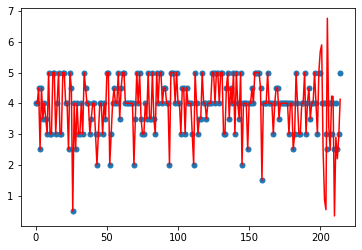

In [12]:
x_label = np.arange(n)
y_real = Y
y_pred = [pred(args,x) for x in X]
plt.plot(x_label, y_real, 'o', markersize = 5)
plt.plot(x_label, y_pred, 'r', markersize = 5)
plt.show()

Wykres dla zbioru treningowego

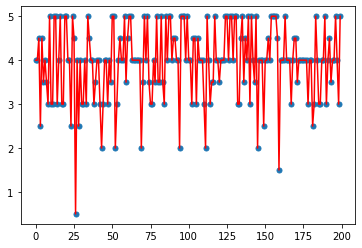

In [13]:
x_label = np.arange(trainsize)
y_real = Y[:trainsize] 
y_pred = [pred(args,x) for x in trainX]
plt.plot(x_label, y_real, 'o', markersize = 5)
plt.plot(x_label, y_pred, 'r')
plt.show()

Wykres dla zbioru walidacyjnego

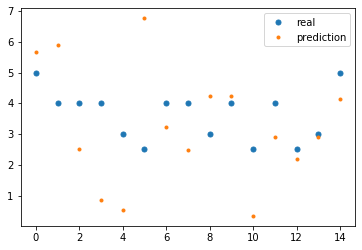

In [14]:
x_label = np.arange(n-trainsize)
y_real = Y[trainsize:] 
y_pred = [pred(args,x) for x in valX]
plt.plot(x_label, y_real, 'o', markersize = 5, label='real')
plt.plot(x_label, y_pred, 'o', markersize = 3, label='prediction')
plt.legend()
plt.show()